In [106]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2)

In [2]:
dailyData = pd.read_csv('train.csv')

In [3]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dailyData.shape

(10886, 12)

In [5]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
dailyData['date'] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData['hour'] = dailyData.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [7]:
dailyData['weekday'] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
dailyData['month'] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, '%Y-%m-%d').month])

In [8]:
dailyData['season'] = dailyData.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'winter'})
dailyData['weather'] = dailyData.weather.map({1:'Clear + Few clouds + Partly cloudy + Partly cloudy',
                                              2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                              3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Lkight Rain + Scattered clouds', 
                                              4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [9]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]

In [10]:
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [11]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


In [12]:
dailyData = dailyData.drop(['datetime'], axis=1)

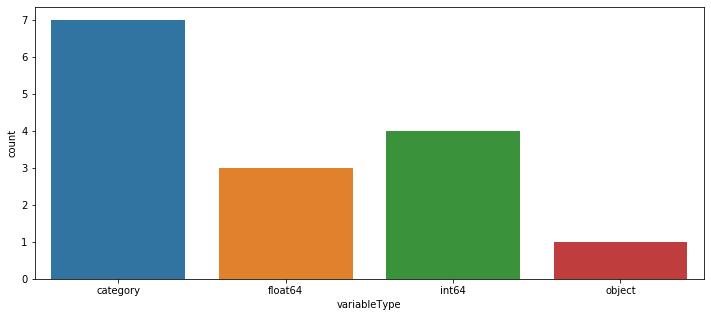

In [13]:
typesCountSerie = dailyData.dtypes.value_counts()

# format columns as arrays of either strings or integers
# typeNames are easier to sort as array of `string` rather than an array of `dtype`
typeNamesColumn = list(map(lambda t: t.name , typesCountSerie.index.values));
typeCountColumn = typesCountSerie.values

# create an initial dataframe, with multiple occurences of the same "variableType"
intialDataTypeDf = pd.DataFrame({
    "variableType": typeNamesColumn, 
    "count": typeCountColumn
})

# Group initial data frame by "variableType", 
# then reset_index to have a proper dataframe
groupedDataTypeDf = intialDataTypeDf.groupby(['variableType']).sum()[['count']].reset_index()

# Plot as expect
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=groupedDataTypeDf, x="variableType",y="count", ax=ax)

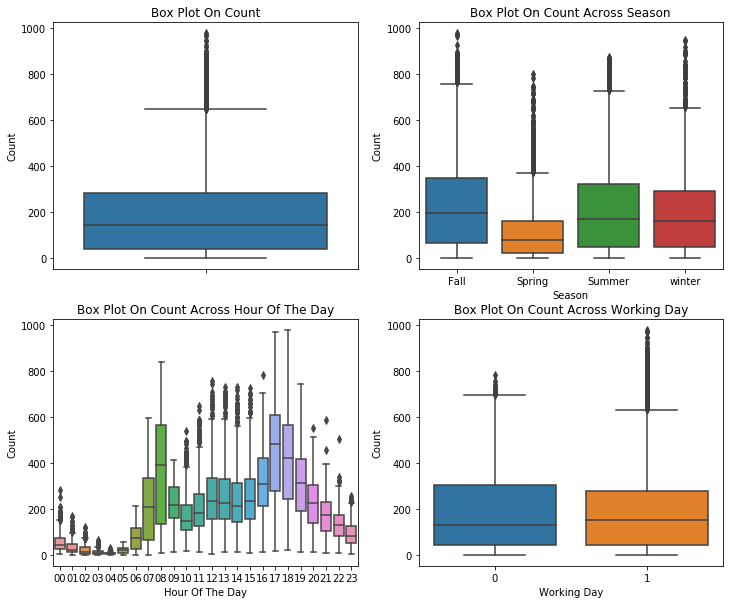

In [14]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(data=dailyData, y='count',orient="v", ax=ax[0][0])
ax[0][0].set(ylabel='Count', title='Box Plot On Count')
sns.boxplot(data=dailyData, y='count',orient="v", x='season', ax=ax[0][1])
ax[0][1].set(xlabel='Season', ylabel='Count', title='Box Plot On Count Across Season')
sns.boxplot(data=dailyData, y='count',orient="v", x='hour', ax=ax[1][0])
ax[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title='Box Plot On Count Across Hour Of The Day')
sns.boxplot(data=dailyData, y='count',orient="v", x='workingday', ax=ax[1][1])
ax[1][1].set(xlabel='Working Day', ylabel='Count', title='Box Plot On Count Across Working Day')
plt.show()

In [15]:
#평균으로 부터 3*표준편차 만큼 떨어져 있는 값 제외
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"]-dailyData["count"].mean())<=(3*dailyData["count"].std())] 

In [16]:
dailyData.shape, dailyDataWithoutOutliers.shape

((10886, 15), (10739, 15))

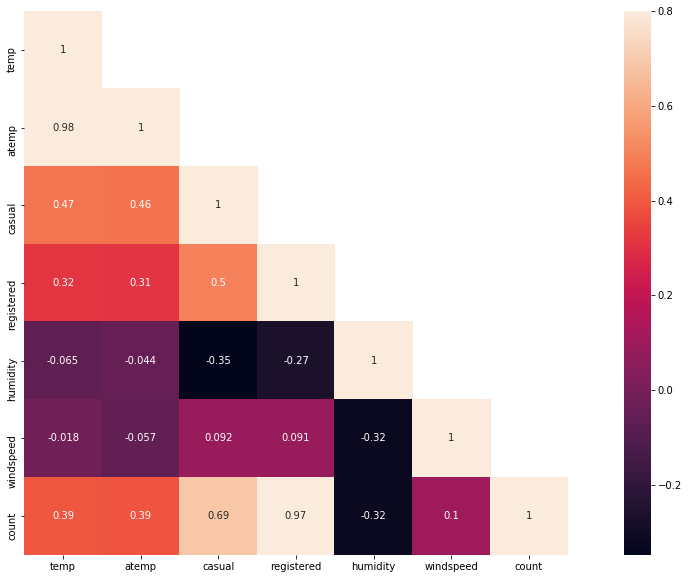

In [17]:
corrMatt = dailyData[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
plt.show()

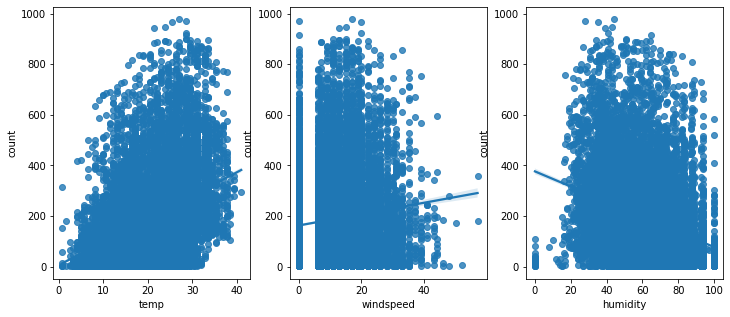

In [18]:
fig, ax = plt.subplots(1,3 ,figsize=(12,5))
sns.regplot(x='temp', y='count', data=dailyData, ax=ax[0])
sns.regplot(x='windspeed', y='count', data=dailyData, ax=ax[1])
sns.regplot(x='humidity', y='count', data=dailyData, ax=ax[2])
plt.show()

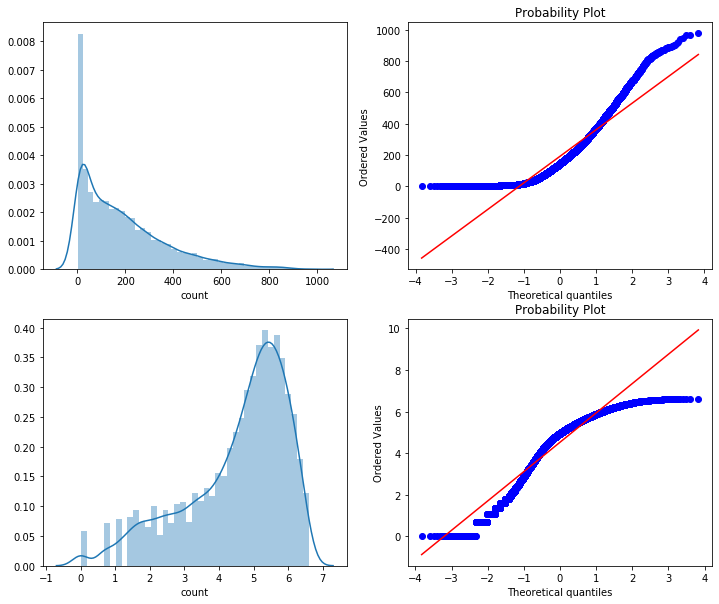

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
sns.distplot(dailyData['count'], ax=ax[0][0])
stats.probplot(dailyData['count'], dist='norm', fit=True, plot=ax[0][1])
sns.distplot(np.log(dailyDataWithoutOutliers['count']), ax=ax[1][0])
stats.probplot(np.log(dailyDataWithoutOutliers['count']), dist='norm', fit=True, plot=ax[1][1])
plt.show()

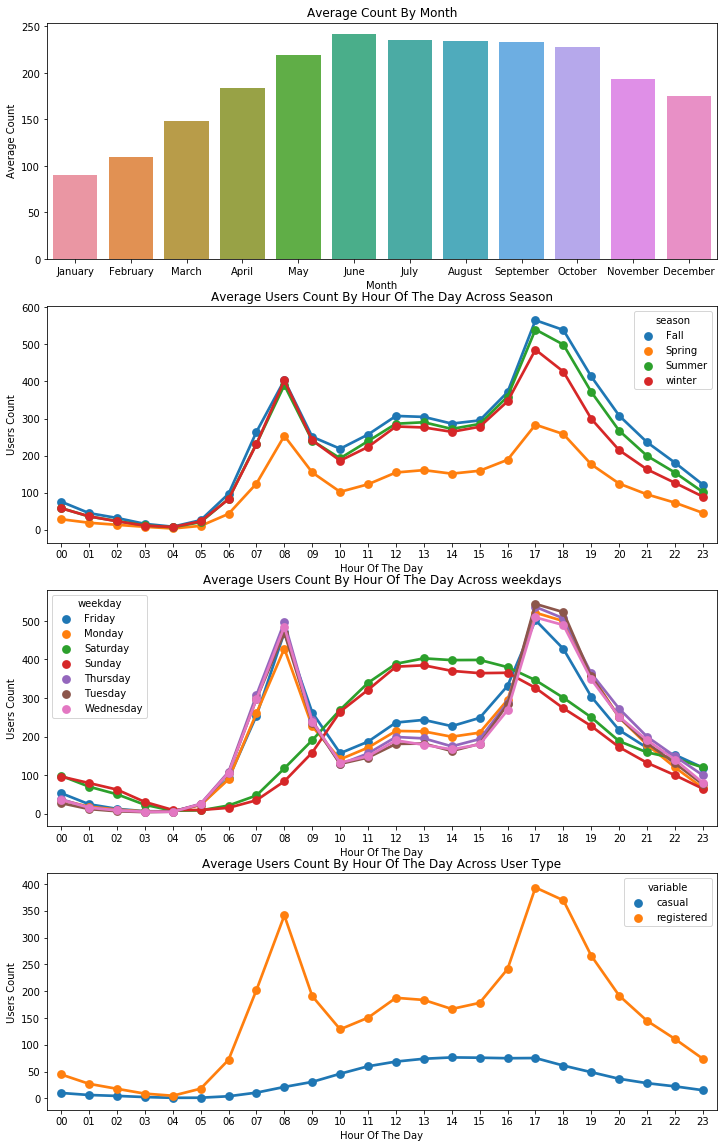

In [21]:
fig, ax = plt.subplots(4,1, figsize=(12,20))
sortOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hueOrder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday']

monthAggregated = pd.DataFrame(dailyData.groupby('month')['count'].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by='count', ascending=False)
sns.barplot(data=monthSorted, x='month', y='count', ax=ax[0], order=sortOrder)
ax[0].set(xlabel='Month', ylabel='Average Count', title='Average Count By Month')

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax[1])
ax[1].set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated1 = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated1["hour"], y=hourAggregated1["count"],hue=hourAggregated1["weekday"], data=hourAggregated1, join=True,ax=ax[2])
ax[2].set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across weekdays",label='big')

hourTransformed = pd.melt(dailyData[['hour', 'casual', 'registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated3 = pd.DataFrame(hourTransformed.groupby(['hour', 'variable'], sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated3['hour'], y=hourAggregated3['value'], hue=hourAggregated3['variable'], hue_order=['casual', 'registered'], data=hourAggregated3, join=True, ax=ax[3])
ax[3].set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

plt.show()

In [22]:
dataTrain = pd.read_csv('train.csv')
dataTest = pd.read_csv('test.csv')

In [23]:
data = dataTrain.append(dataTest)

In [29]:
data.reset_index(inplace=True)

In [31]:
data.drop('index', inplace=True, axis=1)

In [35]:
data['date'] = data.datetime.apply(lambda x : x.split()[0])
data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x : x.split()[0].split('-')[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [41]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data['windspeed'] == 0]
dataWindNot0 = data[data['windspeed'] != 0]
rfModel_wind = RandomForestRegressor()
windColumns = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed'])

wind0Values = rfModel_wind.predict(X = dataWind0[windColumns])
dataWind0['windspeed'] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [60]:
categoricalFeatureNames = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']
numericalFeatureNames = ['temp', 'humidity', 'windspeed', 'atemp']
dropfeatures = ['casual', 'count', 'datetime', 'date', 'registered']

In [61]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

In [67]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
yLablesCasual = dataTrain['casual']

In [68]:
dataTrain = dataTrain.drop(dropfeatures, axis=1)
dataTest = dataTest.drop(dropfeatures, axis=1)

In [69]:
#RMSLE Score
def rmsle(y,y_, convertExp=True):
    if convertExp:
        y = np.exp(y)
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [70]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [71]:
lModel = LinearRegression()
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain, y = yLabelsLog)

preds = lModel.predict(X = dataTrain)
print('RMSLE Value For Linear Regression: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9779746305440514


In [83]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring = rmsle_scorer, cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779746154792506


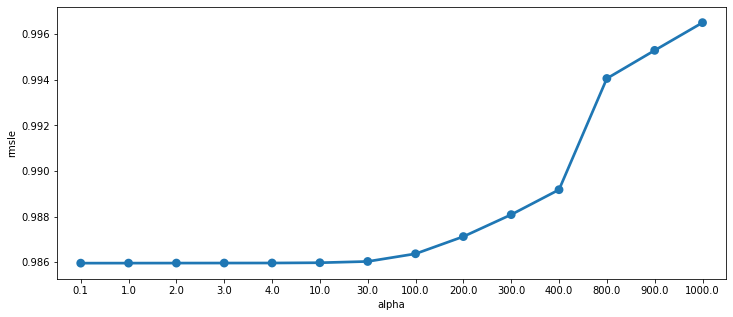

In [92]:
fig, ax = plt.subplots(figsize=(12,5))
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)
plt.show()

In [94]:
lasso_m_ = Lasso()

alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter' : [3000], 'alpha' : alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring = rmsle_scorer, cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit(dataTrain, yLabelsLog)
preds = grid_lasso_m.predict(X = dataTrain)
print(grid_lasso_m.best_params_)
print('RMSLE Value For Lasso Regression: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781116395590104


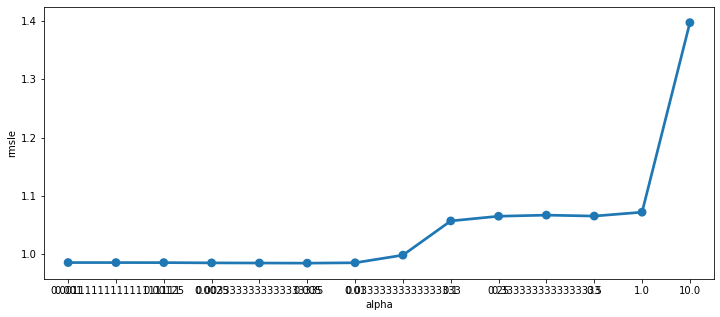

In [99]:
fig, ax = plt.subplots(figsize=(12,5))
df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x : x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x:-x)
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)
plt.show()

In [100]:
#Ensemble Models - Random Forest
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain, yLabelsLog)
preds = rfModel.predict(X = dataTrain)
print('RMSLE Value For Random Forest: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value For Random Forest:  0.10299192016638625


In [101]:
#Ensemble Model - Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain, yLabelsLog)
preds = gbm.predict(X = dataTrain)
print('RMSLE Value For Gradient Boost: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value For Gradient Boost:  0.18877726154670113


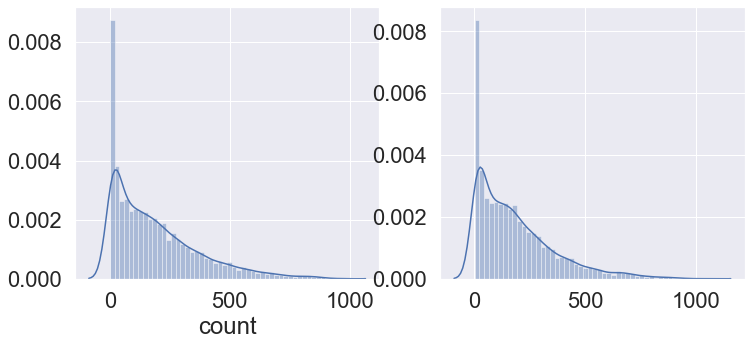

In [107]:
predsTest = gbm.predict(X = dataTest)
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(yLabels, ax=ax[0], bins=50)
sns.distplot(np.exp(predsTest), ax=ax[1], bins=50)
plt.show()

In [108]:
submission = pd.DataFrame({'datetime' : datetimecol, 'count' : [max(0,x) for x in np.exp(predsTest)]})
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)